<a href="https://colab.research.google.com/github/r-autowired/AIMLWorks/blob/main/Notes/ML_Models/RestaurantTurnOver_Hacked_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2874]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 300)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [2875]:
# loading the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2876]:
data = pd.read_csv("/content/drive/MyDrive/AIML_UT/Colab_Files/Pi2_ML/W1_Linear/Hacky/Train_dataset.csv")

In [2877]:
# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [2878]:
data.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Type,Restaurant Theme,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,1,1,0,1,2.0,Bar,Arabian,3,0,2,5,5,5,7,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,1,1,1,0,2.0,Bar,Greek,3,0,6,6,6,7,8,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,1,1,1,0,2.0,Bar,90's,3,0,2,6,5,3,7,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,1,1,1,1,1.0,Bar,Arabian,3,1,7,6,5,6,8,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,1,1,1,1,NaN,Bar,Greek,3,0,10,5,6,4,8,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [2879]:
data.shape

(3493, 34)

In [2880]:
df = data.copy()

In [2881]:
df.duplicated().sum()

np.int64(0)

In [2882]:
df.isnull().sum()

,0
Registration Number,0
Annual Turnover,0
Cuisine,0
City,0
Restaurant Location,0
Opening Day of Restaurant,0
Facebook Popularity Quotient,99
Endorsed By,0
Instagram Popularity Quotient,56
Fire Audit,0


- since Live Sports rating most of the entries are NA/Null we are dropping the whole column

In [2883]:
print("Data type of City:", df['City'].dtype)

Data type of City: object


In [2884]:
print("Rows with -1 (numeric):", len(df[df['City'] == -1]))

Rows with -1 (numeric): 0


In [2885]:
print("Rows with '-1' (string):", len(df[df['City'] == '-1']))

Rows with '-1' (string): 396


In [2886]:
df['City'] = df['City'].replace('-1', np.nan)

In [2887]:
print("Missing values after replacement:", df['City'].isna().sum())

Missing values after replacement: 396


In [2888]:
print("Rows with '-1' (string):", len(df[df['City'] == '-1']))

Rows with '-1' (string): 0


- Treated the missing values of City with Unknown

In [2889]:
# Impute with median
#fb_median = df['Facebook Popularity Quotient'].median()
#df['Facebook Popularity Quotient'] = df['Facebook Popularity Quotient'].fillna(fb_median)
#print("Missing values after imputation:", df['Facebook Popularity Quotient'].isna().sum())

# Impute with median
#insta_median = df['Instagram Popularity Quotient'].median()
#df['Instagram Popularity Quotient'] = df['Instagram Popularity Quotient'].fillna(insta_median)
#print("Missing values after imputation:", df['Instagram Popularity Quotient'].isna().sum())

# Impute with mode
#tier_mode = df['Resturant Tier'].mode()[0]  # Take the first mode if multiple
#df['Resturant Tier'] = df['Resturant Tier'].fillna(tier_mode)
#print("Missing values after imputation:", df['Resturant Tier'].isna().sum()




In [2890]:
print("Missing values after imputation:", df['Live Music Rating'].isna().sum())
print("Missing values after imputation:", df['Comedy Gigs Rating'].isna().sum())


df['City'] = df['City'].fillna('Other')
df['Cuisine'] = df['Cuisine'].fillna('Other')  # Adjust column name if different
df['Restaurant Theme'] = df['Restaurant Theme'].fillna('Other')  # Adjust column name
for col in ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Overall Restaurant Rating', 'Ambience',
            'Fire Audit', 'Liquor License Obtained', 'Restaurant Zomato Rating', 'Order Wait Time',
            'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Lively',
            'Service', 'Comfortablility', 'Privacy']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())
for col in ['Live Music Rating', 'Comedy Gigs Rating']:
    if col in df.columns:
        df[col] = df[col].fillna(0)
        df[f'Has_{col.split()[0]}_{col.split()[1]}'] = df[col].notna().astype(int)

print("Missing values after imputation:", df['Live Music Rating'].isna().sum())
print("Missing values after imputation:", df['Comedy Gigs Rating'].isna().sum())

Missing values after imputation: 765
Missing values after imputation: 2483
Missing values after imputation: 0
Missing values after imputation: 0


In [2891]:
# Define city correction dictionary (update based on your data)
city_corrections = {
    'bengaluru': 'bangalore',
    'banglore': 'bangalore',
    'gandhi nagar': 'gandhinagar',
    'navi mumbai': 'mumbai',
    'new delhi': 'delhi',
    'greater noida': 'noida',
    'ncr':'noida',
    'nouda':'noida',
    'pondi': 'pondicherry',
    'pondy': 'pondicherry',
    'punr': 'pune',
    'siliguri': 'singaruli',
    'una': 'unnao',
    'trivandrum': 'thiruvananthapuram',
    'technopark, trivandrum': 'thiruvananthapuram',
    'tirupathi': 'tirupati',
    'gurgoan': 'gurgaon',
    'kochi/cochin': 'cochin',
    'bankura': 'bangalore',
    'kochi': 'cochin',
    'am': 'ambala',
    'bhubaneshwar': 'bhubaneswar',
    'bhubneshwar': 'bhubaneswar',
    'gajiabaad': 'ghaziabad',
    'gaziabaad':"ghaziabad",
    'gurga':'gurgaon',
    'hderabad': 'hyderabad',
    'hyderabad(bhadurpally)': 'hyderabad',
    'muzzafarpur': 'muzaffarpur',
    'indirapuram, ghaziabad': 'ghaziabad',
    'nasikcity': 'nashik',
    'vizag':'visakhapatnam',
    'vsakhapttnam': 'visakhapatnam',
    'kolkata`': 'kolkata',
    # Add more as needed
}

# Function to clean city names
def clean_cities(city_str, corrections):
    if pd.isna(city_str):
        return city_str
    # Split by comma or ampersand, clean each city, then join back
    #cities = [city.strip() for city in city_str.replace('&', ',').split(',')]
    #cities = city_str.strip()
    corrected_cities = corrections.get(city_str, city_str)
    return corrected_cities



In [2892]:
#print("Unique values in City:", df['City'].unique())
#print("Unique values Count in City:", len(df['City'].unique()))
# Sort the DataFrame 'df' by the 'City' column in ascending order
df_sorted = df.sort_values(by=['City'], ascending=True)

# Display the sorted DataFrame
print(df_sorted['City'])
# Get unique city names and sort them
sorted_cities = sorted(df['City'].unique())

# Print the sorted unique city names
print(sorted_cities)
### Making cities names all lower cases
df['City'] = df['City'].str.strip()
df['City'] = df['City'].str.lower()
# Clean the 'Cities' column (replace 'Cities' with your actual column name)
df['City'] = df['City'].apply(lambda x: clean_cities(x, city_corrections))

672          Chennai
2230           Delhi
2722            Pune
787         ariyalur
1175          mumbai
            ...     
357          udaipur
3028         udaipur
3408            vapi
581            vizag
203     vsakhapttnam
Name: City, Length: 3493, dtype: object
[' Chennai', ' Delhi', ' Pune', ' ariyalur', ' mumbai', 'AM', 'Agra', 'Ahmedabad', 'Ahmedabad ', 'Ahmednagar', 'Allahabad', 'Alwar', 'Ambala', 'Asansol', 'Aurangabad', 'Australia', 'BANGALORE', 'BAngalore', 'BHOPAL', 'BHUBANESWAR', 'Baddi HP', 'Bahadurgarh', 'Banagalore', 'Bangalore', 'Bangalore ', 'Banglore', 'Banglore ', 'Bankura', 'Bareli', 'Baroda', 'Bathinda', 'Beawar', 'Belgaum', 'Bellary', 'Bengaluru', 'Bhagalpur', 'Bharuch', 'Bhilai', 'Bhiwadi', 'Bhopal', 'Bhopal ', 'Bhubaneshwar', 'Bhubaneswar', 'Bhubaneswar ', 'Bhubneshwar', 'Bikaner', 'Bilaspur', 'Bulandshahar', 'Bundi', 'Burdwan', 'CHENNAI', 'CHEYYAR', 'Calicut', 'Chandigarh', 'Chandigarh ', 'Chandrapur', 'Chennai', 'Chennai ', 'Chennai & Mumbai', 'Chennai, 

In [2893]:
## Split restaurants with two cities
def split_cities1x(df, column_name='City'):
    # Replace '&' with ',' for consistency
    #df[column_name] = df[column_name].str.replace('&', ',')

    # Split cities and explode into separate rows
    df_expanded = df.assign(**{column_name: df[column_name].str.split(',')}).explode(column_name)

    # Strip whitespace from city names
    df_expanded[column_name] = df_expanded[column_name].str.strip()
    return df_expanded

# Apply to your DataFrame (replace 'Cities' with your actual column name)
##df_expanded = split_cities(df, 'Cities')
##print("New row count after duplication:", df_expanded.shape[0])
##print("Sample of expanded data:")
##print(df_expanded[['Cities', 'Annual Turnover']].head(10))

In [2894]:
# Extract year only
#df['Opening_Year'] = df['Opening Day of Restaurant'].dt.year
#df = df.drop(columns=['Opening Day of Restaurant'])
# Drop the original datetime column (optional)
#df = df.drop(columns=['Value Deals Rating'])

df['Opening Day of Restaurant'] = pd.to_datetime(df['Opening Day of Restaurant'], errors='coerce')
median_date = df['Opening Day of Restaurant'].dropna().median()
df['Opening Day of Restaurant'] = df['Opening Day of Restaurant'].fillna(median_date)
reference_date = pd.to_datetime('2025-03-29')
df['Days_Since_Opening'] = (reference_date - df['Opening Day of Restaurant']).dt.days.astype(float)
df = df.drop(columns=['Opening Day of Restaurant'])

In [2895]:
df['Overall_Rating_Squared'] = df['Overall Restaurant Rating'] ** 2
df['Ambience_Squared'] = df['Ambience'] ** 2
df['Social_Media_Interaction'] = df['Facebook Popularity Quotient'] * df['Instagram Popularity Quotient']
df['Entertainment_Score'] = df['Live Music Rating'] + df['Comedy Gigs Rating']

In [2896]:
df.drop(['Live Music Rating'], axis=1, inplace=True)
df.drop(['Comedy Gigs Rating'], axis=1, inplace=True)
df.drop(['Value Deals Rating'], axis=1, inplace=True)
df.drop(['Registration Number'], axis=1, inplace=True)
df.drop(['Resturant Tier'], axis=1, inplace=True)
df.drop(['Live Sports Rating'], axis=1, inplace=True)
#df.drop(['Facebook Popularity Quotient', 'Instagram Popularity Quotient'], axis=1, inplace=True)
#df.drop(['Overall Restaurant Rating', 'Ambience'], axis=1, inplace=True)
#df.drop(['Has_Live_Music', 'Has_Comedy_Gigs'], axis=1, inplace=True)

In [2897]:
# New numeric columns (assuming present)
for col in ['Fire Audit', 'Liquor License Obtained', 'Restaurant Zomato Rating', 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Lively', 'Service', 'Comfortablility', 'Privacy']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Group rare categories
for col in ['City', 'Cuisine', 'Restaurant Theme']:
    counts = df[col].value_counts()
    #print(counts)
    rare = counts[counts < 35].index
    df[col] = df[col].replace(rare, 'Other_' + col)

In [2898]:
# defining the dependent and independent variables
X = df.drop(["Annual Turnover"], axis=1)
y = df["Annual Turnover"]

In [2899]:
# creating dummy variables
#X = pd.get_dummies(
 #   X,
  #  columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
   # drop_first=True,
#)
X = pd.get_dummies(X, columns=['City', 'Cuisine', 'Restaurant Theme', 'Restaurant Type', 'Endorsed By', 'Restaurant Location'], prefix=['City', 'Cuisine', 'Theme', 'Type', 'Endorsed', 'Location'], drop_first=True)

X = X.astype(float)

X.head()

,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Ambience,Lively,Service,Comfortablility,Privacy,Has_Live_Music,Has_Comedy_Gigs,Days_Since_Opening,Overall_Rating_Squared,Ambience_Squared,Social_Media_Interaction,Entertainment_Score,City_bangalore,City_bhubaneswar,City_chennai,City_delhi,City_gurgaon,City_hyderabad,City_jaipur,City_kolkata,City_mumbai,City_mysore,City_noida,City_other,City_pune,"Cuisine_algerian,algerian","Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",Theme_Arabian,Theme_Chinese,Theme_Greek,Theme_Nature,Theme_Other_Restaurant Theme,Theme_Parsi,Type_Buffet/Family Restaurant,Type_Caffee,Type_Gastro Bar,Endorsed_Not Specific,Endorsed_Tier A Celebrity,Location_Near Party Hub
0,84.3,95.8,1.0,1.0,1.0,0.0,1.0,3.0,0.0,2.0,5.0,5.0,5.0,7.0,10.0,8.0,8.0,6.0,6.0,6.0,1.0,1.0,5887.0,100.0,64.0,8075.94,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,85.4,85.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,6.0,6.0,6.0,7.0,8.0,9.0,5.0,7.0,7.0,3.0,8.0,1.0,1.0,6025.0,81.0,25.0,7259.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,85.0,68.2,1.0,1.0,1.0,1.0,0.0,3.0,0.0,2.0,6.0,5.0,3.0,7.0,8.0,7.0,10.0,5.0,2.0,8.0,1.0,1.0,4991.0,64.0,49.0,5797.00,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,85.6,83.6,0.0,1.0,1.0,1.0,1.0,3.0,1.0,7.0,6.0,5.0,6.0,8.0,9.0,7.0,7.0,4.0,3.0,5.0,1.0,1.0,5963.0,81.0,49.0,7156.16,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,79.0,76.8,1.0,1.0,1.0,1.0,1.0,3.0,0.0,10.0,5.0,6.0,4.0,8.0,6.0,7.0,6.0,2.0,4.0,6.0,1.0,1.0,5514.0,36.0,49.0,6067.20,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [2900]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# fitting a linear model
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(X_train, y_train)

LinearRegression()

In [2901]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model1_perf_train = model_performance_regression(
    lin_reg_model1, X_train, y_train
)
lin_reg_model1_perf_train


Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,1.908972e+07,1.056165e+07,0.186267,0.157708


In [2902]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model1_perf_test = model_performance_regression(lin_reg_model1, X_test, y_test)
lin_reg_model1_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared
0,2.124956e+07,1.063516e+07,0.095984,0.047579


In [2903]:
print("Mean Annual Turnover:", df['Annual Turnover'].mean())
print("Std Dev Annual Turnover:", df['Annual Turnover'].std())

Mean Annual Turnover: 30725708.559977096
Std Dev Annual Turnover: 21651246.901145678


In [2904]:
print("Mean Annual Turnover:", df['Annual Turnover'].mean())
print("Std Dev Annual Turnover:", df['Annual Turnover'].std())
print("RMSE as % of mean:", (1.753878e+07 / df['Annual Turnover'].mean()) * 100)

Mean Annual Turnover: 30725708.559977096
Std Dev Annual Turnover: 21651246.901145678
RMSE as % of mean: 57.08177556186869


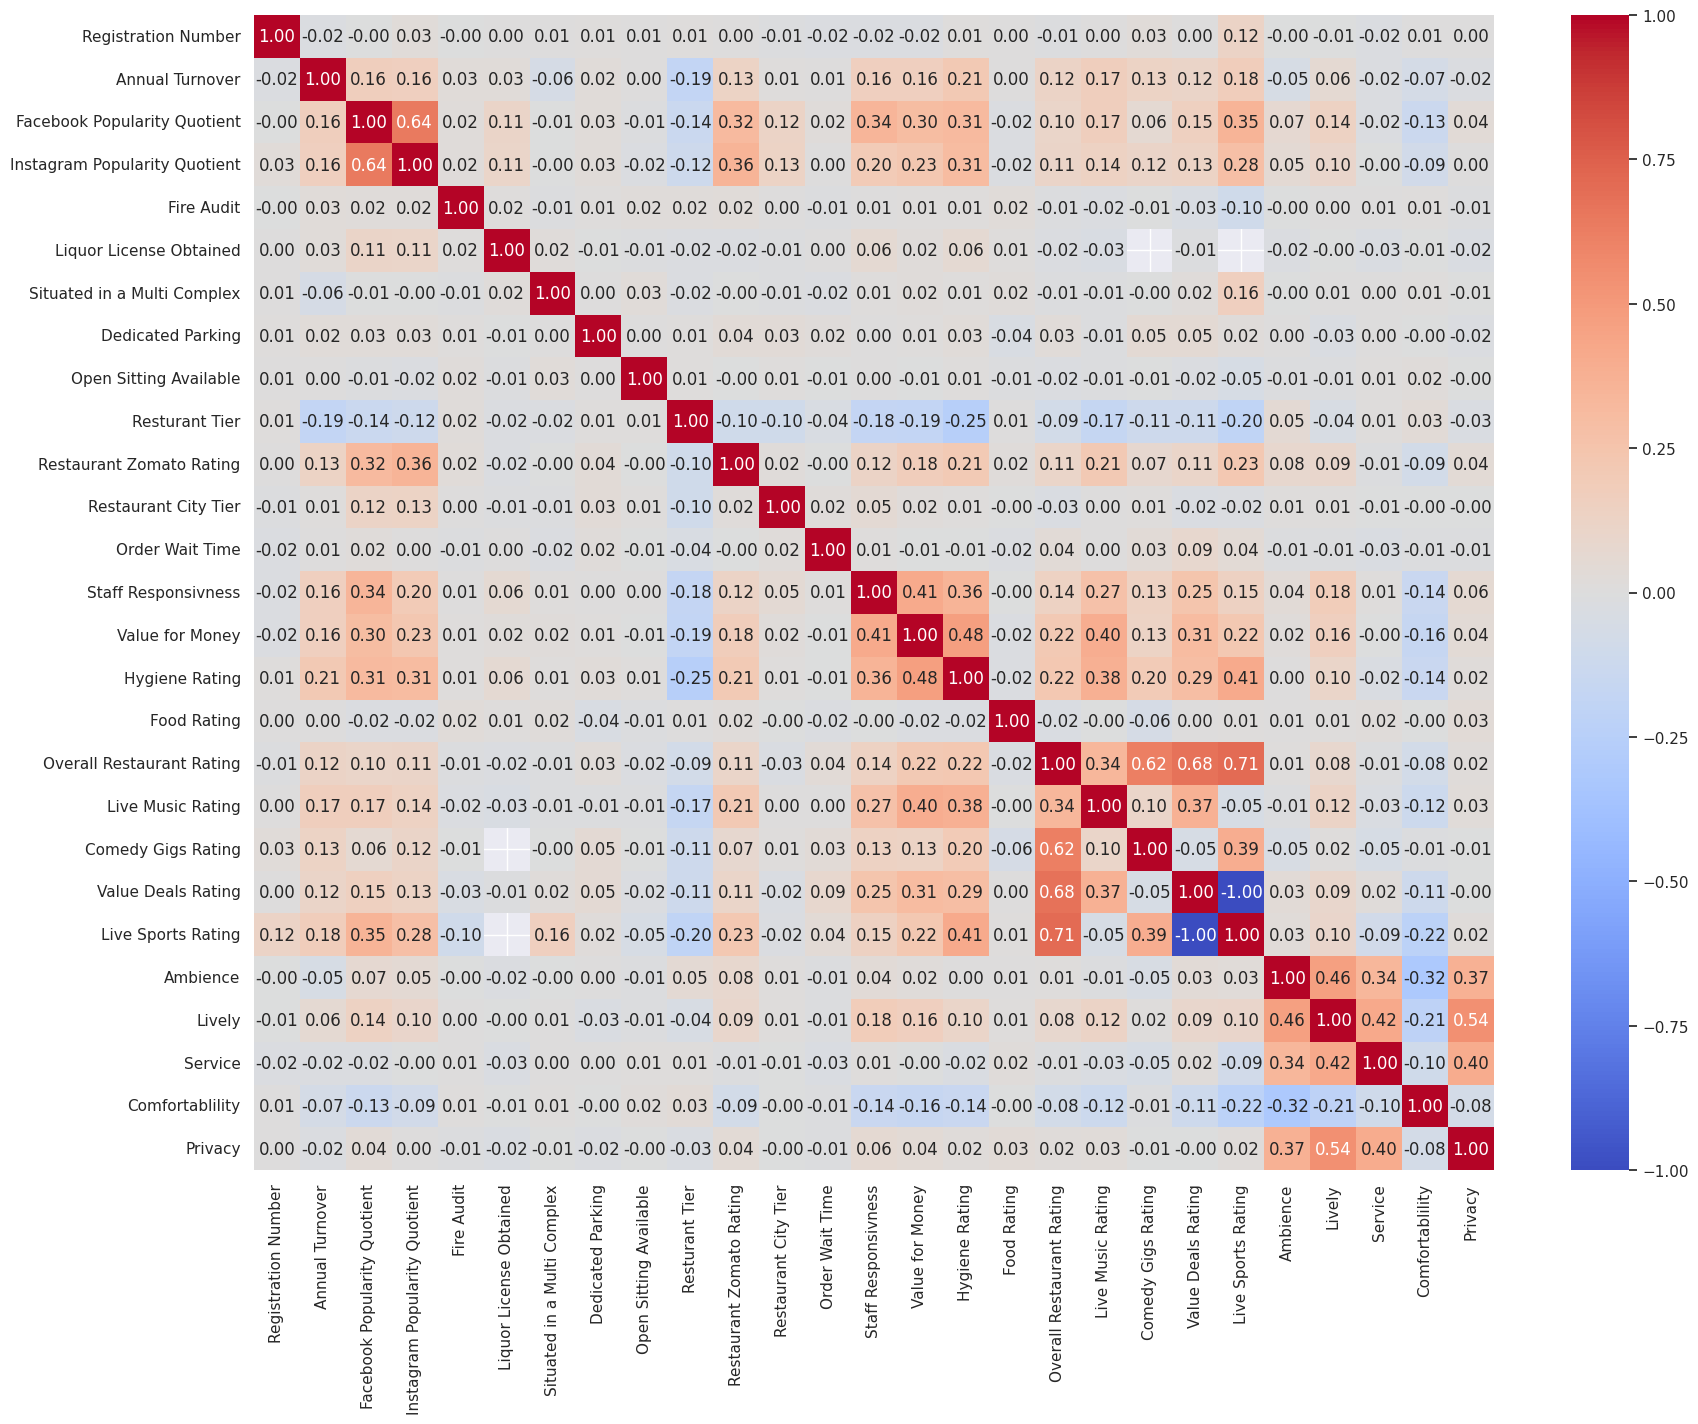

In [2905]:

# defining the figure size
plt.figure(figsize=(20, 15))

# plotting the correlation heatmap
sns.heatmap(data.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='coolwarm');

In [2906]:
##print("Tier vs Turnover correlation:", df['Resturant Tier'].corr(df['Annual Turnover']))
for name, coef in zip(X_train.columns, lin_reg_model1.coef_):
    print(f"{name}: {coef}")


Facebook Popularity Quotient: 217462.0484540558
Instagram Popularity Quotient: 210484.22265217404
Fire Audit: 1060374.3156355028
Liquor License Obtained: 4548764.644094246
Situated in a Multi Complex: -4653720.716090488
Dedicated Parking: 1464638.6947381424
Open Sitting Available: -1175334.0405540504
Restaurant Zomato Rating: 2417906.914630127
Restaurant City Tier: -1611717.5349802952
Order Wait Time: 113704.08788652223
Staff Responsivness: 1073325.418415233
Value for Money: 546643.5304371207
Hygiene Rating: 1450510.5415217762
Food Rating: 170487.2790562762
Overall Restaurant Rating: 5189491.546836352
Ambience: -81709.53252694709
Lively: 658012.4770184483
Service: 325006.7236607976
Comfortablility: -488722.56300040067
Privacy: -521251.28045080276
Has_Live_Music: 3.3527612686157227e-08
Has_Comedy_Gigs: 1.234002411365509e-08
Days_Since_Opening: 7004.856169238337
Overall_Rating_Squared: -283574.83173636417
Ambience_Squared: -62051.71666012518
Social_Media_Interaction: -859.3092935732566
E

In [2907]:
print(df['Annual Turnover'].describe())

count    3.493000e+03
mean     3.072571e+07
std      2.165125e+07
min      3.500000e+06
25%      1.800000e+07
50%      3.000000e+07
75%      3.700000e+07
max      4.000000e+08
Name: Annual Turnover, dtype: float64


In [2908]:
df['Log_Annual_Turnover'] = np.log1p(df['Annual Turnover'])
df['Log_Annual_Turnover']

,Log_Annual_Turnover
0,17.553180
1,17.727534
2,17.296751
3,18.515991
4,16.811243
...,...
3488,17.516813
3489,17.296751
3490,17.565015
3491,17.785802


In [2909]:
test_data = pd.read_csv("/content/drive/MyDrive/AIML_UT/Colab_Files/Pi2_ML/W1_Linear/Hacky/Test_dataset.csv")
test_df = test_data.copy()

In [2910]:
print("Rows with '-1' (string):", len(test_df[test_df['City'] == '-1']))

Rows with '-1' (string): 65


In [2911]:
test_df['City'] = test_df['City'].replace('-1', np.nan)

In [2912]:
test_df['City'] = test_df['City'].fillna('unknown')

In [2913]:
print("Rows with '-1' (string):", len(test_df[test_df['City'] == '-1']))

Rows with '-1' (string): 0


In [2914]:
print("Missing values after imputation:", test_df['Live Music Rating'].isna().sum())
print("Missing values after imputation:", test_df['Comedy Gigs Rating'].isna().sum())


test_df['City'] = test_df['City'].fillna('Other')
test_df['Cuisine'] = test_df['Cuisine'].fillna('Other')  # Adjust column name if different
test_df['Restaurant Theme'] = test_df['Restaurant Theme'].fillna('Other')  # Adjust column name
for col in ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Overall Restaurant Rating', 'Ambience',
            'Fire Audit', 'Liquor License Obtained', 'Restaurant Zomato Rating', 'Order Wait Time',
            'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Lively',
            'Service', 'Comfortablility', 'Privacy']:
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(test_df[col].median())
for col in ['Live Music Rating', 'Comedy Gigs Rating']:
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(0)
        test_df[f'Has_{col.split()[0]}_{col.split()[1]}'] = test_df[col].notna().astype(int)

print("Missing values after imputation:", test_df['Live Music Rating'].isna().sum())
print("Missing values after imputation:", test_df['Comedy Gigs Rating'].isna().sum())

Missing values after imputation: 102
Missing values after imputation: 370
Missing values after imputation: 0
Missing values after imputation: 0


In [2915]:

### Making cities names all lower cases
test_df['City'] = test_df['City'].str.strip()
test_df['City'] = test_df['City'].str.lower()
# Clean the 'Cities' column (replace 'Cities' with your actual column name)
test_df['City'] = test_df['City'].apply(lambda x: clean_cities(x, city_corrections))
# Get unique city names and sort them
sorted_cities = sorted(test_df['City'].unique())

# Print the sorted unique city names
print(sorted_cities)

['ahmedabad', 'ambala city', 'asifabadbanglore', 'banaglore', 'bangalore', 'baripada', 'bhopal', 'bhubaneswar', 'bilaspur', 'chandigarh', 'chennai', 'cochin', 'coimbatore', 'dammam', 'dausa', 'dehradun', 'delhi', 'faridabad', 'gorakhpur', 'guragaon', 'gurgaon', 'guwahati', 'haldia', 'haryana', 'hissar', 'hubli', 'hyderabad', 'indore', 'jaipur', 'jodhpur', 'kanpur', 'karad', 'karnal', 'kolkata', 'latur (maharashtra )', 'lucknow', 'madurai', 'mainpuri', 'mangalore', 'meerut', 'mohali', 'mumbai', 'mysore', 'nagpur', 'new dehli', 'noida', 'ongole', 'patiala', 'patna', 'phagwara', 'pilani', 'pondicherry', 'pune', 'rae bareli', 'raipur', 'rajkot', 'rajpura', 'ranchi', 'rourkela', 'rudrapur', 'sambalpur', 'sampla', 'secunderabad', 'shahibabad', 'thane', 'thiruvananthapuram', 'unknown', 'vellore', 'yamuna nagar']


In [2916]:
test_df['Opening Day of Restaurant'] = pd.to_datetime(test_df['Opening Day of Restaurant'], errors='coerce')
test_median_date = test_df['Opening Day of Restaurant'].dropna().median()
test_df['Opening Day of Restaurant'] = test_df['Opening Day of Restaurant'].fillna(test_median_date)
test_reference_date = pd.to_datetime('2025-03-29')
test_df['Days_Since_Opening'] = (test_reference_date - test_df['Opening Day of Restaurant']).dt.days.astype(float)
test_df = test_df.drop(columns=['Opening Day of Restaurant'])

In [2917]:
test_df['Social_Media_Interaction'] = test_df['Facebook Popularity Quotient'] * test_df['Instagram Popularity Quotient']
test_df['Overall_Rating_Squared'] = test_df['Overall Restaurant Rating'] ** 2
test_df['Ambience_Squared'] = test_df['Ambience'] ** 2
test_df['Entertainment_Score'] = test_df['Live Music Rating'] + test_df['Comedy Gigs Rating']

In [2918]:
test_df.drop(['Live Music Rating'], axis=1, inplace=True)
test_df.drop(['Comedy Gigs Rating'], axis=1, inplace=True)
test_df.drop(['Value Deals Rating'], axis=1, inplace=True)
test_df.drop(['Registration Number'], axis=1, inplace=True)
test_df.drop(['Resturant Tier'], axis=1, inplace=True)
test_df.drop(['Live Sports Rating'], axis=1, inplace=True)
#test_df.drop(['Facebook Popularity Quotient', 'Instagram Popularity Quotient'], axis=1, inplace=True)
#test_df.drop(['Overall Restaurant Rating', 'Ambience'], axis=1, inplace=True)
#df.drop(['Has_Live_Music', 'Has_Comedy_Gigs'], axis=1, inplace=True)

In [2919]:
# New numeric columns (assuming present)
for col in ['Fire Audit', 'Liquor License Obtained', 'Restaurant Zomato Rating', 'Order Wait Time', 'Staff Responsivness', 'Value for Money', 'Hygiene Rating', 'Food Rating', 'Lively', 'Service', 'Comfortablility', 'Privacy']:
    if col in test_df.columns:
        test_df[col] = test_df[col].fillna(test_df[col].median())

# Group rare categories
for col in ['City', 'Cuisine', 'Restaurant Theme']:
    counts = test_df[col].value_counts()
    #print(counts)
    rare = counts[counts < 25].index
    test_df[col] = test_df[col].apply(lambda x: x if x in counts and counts[x] >= 25 else 'Other_' + col) #.replace(rare, 'Other_' + col)
###                           .apply(lambda x: x if x in counts and counts[x] >= 50 else 'Other_' + col)

In [2920]:
P = test_df
#q = test_df["Annual Turnover"]
P = pd.get_dummies(
    P,
    #columns=P.select_dtypes(include=["object", "category"]).columns.tolist(),
    columns=['City', 'Cuisine', 'Restaurant Theme', 'Restaurant Type', 'Endoresed By', 'Restaurant Location'], prefix=['City', 'Cuisine', 'Theme', 'Type', 'Endorsed', 'Location'],
    drop_first=True,
)

P = P.astype(float)
#P_train, P_test, q_train, q_test = train_test_split(X, y, test_size=0.2, random_state=39)
# Get missing columns in the test data
missing_cols = set(X_train.columns) - set(P.columns)
print(missing_cols)
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    P[c] = 0

# Ensure the order of column in the test set is in the same order than in train set
P = P[X_train.columns]

prediction = lin_reg_model1.predict(P)

{'Cuisine_turkish,sapnish', 'Cuisine_peruvian,cuban', 'Cuisine_irish,belgian', 'Theme_Chinese', 'Cuisine_algerian,algerian', 'Cuisine_hawaiian,latvian', 'Cuisine_turkish,nigerian', 'Cuisine_algerian,belgian', 'Cuisine_british,belgian', 'Cuisine_polish,jewish', 'City_jaipur', 'City_kolkata', 'Cuisine_algerian,korean', 'City_bhubaneswar', 'City_mysore', 'Cuisine_swedish,greek', 'Cuisine_cuban,british', 'City_other', 'Theme_Parsi', 'Theme_Nature', 'Cuisine_japanese,thai'}


In [2921]:
X.head()

,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Ambience,Lively,Service,Comfortablility,Privacy,Has_Live_Music,Has_Comedy_Gigs,Days_Since_Opening,Overall_Rating_Squared,Ambience_Squared,Social_Media_Interaction,Entertainment_Score,City_bangalore,City_bhubaneswar,City_chennai,City_delhi,City_gurgaon,City_hyderabad,City_jaipur,City_kolkata,City_mumbai,City_mysore,City_noida,City_other,City_pune,"Cuisine_algerian,algerian","Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",Theme_Arabian,Theme_Chinese,Theme_Greek,Theme_Nature,Theme_Other_Restaurant Theme,Theme_Parsi,Type_Buffet/Family Restaurant,Type_Caffee,Type_Gastro Bar,Endorsed_Not Specific,Endorsed_Tier A Celebrity,Location_Near Party Hub
0,84.3,95.8,1.0,1.0,1.0,0.0,1.0,3.0,0.0,2.0,5.0,5.0,5.0,7.0,10.0,8.0,8.0,6.0,6.0,6.0,1.0,1.0,5887.0,100.0,64.0,8075.94,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,85.4,85.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,6.0,6.0,6.0,7.0,8.0,9.0,5.0,7.0,7.0,3.0,8.0,1.0,1.0,6025.0,81.0,25.0,7259.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,85.0,68.2,1.0,1.0,1.0,1.0,0.0,3.0,0.0,2.0,6.0,5.0,3.0,7.0,8.0,7.0,10.0,5.0,2.0,8.0,1.0,1.0,4991.0,64.0,49.0,5797.00,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,85.6,83.6,0.0,1.0,1.0,1.0,1.0,3.0,1.0,7.0,6.0,5.0,6.0,8.0,9.0,7.0,7.0,4.0,3.0,5.0,1.0,1.0,5963.0,81.0,49.0,7156.16,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,79.0,76.8,1.0,1.0,1.0,1.0,1.0,3.0,0.0,10.0,5.0,6.0,4.0,8.0,6.0,7.0,6.0,2.0,4.0,6.0,1.0,1.0,5514.0,36.0,49.0,6067.20,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [2922]:
P.head()

,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Restaurant Zomato Rating,Restaurant City Tier,Order Wait Time,Staff Responsivness,Value for Money,Hygiene Rating,Food Rating,Overall Restaurant Rating,Ambience,Lively,Service,Comfortablility,Privacy,Has_Live_Music,Has_Comedy_Gigs,Days_Since_Opening,Overall_Rating_Squared,Ambience_Squared,Social_Media_Interaction,Entertainment_Score,City_bangalore,City_bhubaneswar,City_chennai,City_delhi,City_gurgaon,City_hyderabad,City_jaipur,City_kolkata,City_mumbai,City_mysore,City_noida,City_other,City_pune,"Cuisine_algerian,algerian","Cuisine_algerian,belgian","Cuisine_algerian,korean","Cuisine_british,belgian","Cuisine_british,japanese","Cuisine_chinese,salvadorian","Cuisine_cuban,british","Cuisine_hawaiian,latvian","Cuisine_indian,irish","Cuisine_irish,belgian","Cuisine_japanese,thai","Cuisine_peruvian,cuban","Cuisine_polish,jewish","Cuisine_swedish,greek","Cuisine_tibetan,greek","Cuisine_tibetan,italian","Cuisine_turkish,nigerian","Cuisine_turkish,sapnish","Cuisine_welsh,thai",Theme_Arabian,Theme_Chinese,Theme_Greek,Theme_Nature,Theme_Other_Restaurant Theme,Theme_Parsi,Type_Buffet/Family Restaurant,Type_Caffee,Type_Gastro Bar,Endorsed_Not Specific,Endorsed_Tier A Celebrity,Location_Near Party Hub
0,78.00,69.00,1.0,1.0,1.0,1.0,0.0,3.0,0.0,10.0,5.0,3.0,5.0,8.0,6.0,5.0,2.0,2.0,6.0,0.0,1.0,1.0,5373.0,36.0,25.0,5382.0000,2.0,1.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0.0,1.0,0,0,0.0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
1,89.17,96.00,1.0,1.0,1.0,1.0,1.0,4.0,0.0,10.0,4.0,5.0,6.0,8.0,9.0,7.0,8.0,5.0,1.0,8.0,1.0,1.0,4954.0,81.0,49.0,8560.3200,3.0,0.0,0,0.0,0.0,0.0,1.0,0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0.0,1.0,0,0,0.0,0.0,0,0.0,0,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0
2,84.00,86.00,1.0,1.0,1.0,0.0,1.0,2.0,0.0,6.0,5.0,5.0,6.0,9.0,6.0,9.0,7.0,5.0,1.0,5.0,1.0,1.0,5100.0,36.0,81.0,7224.0000,3.0,0.0,0,0.0,0.0,0.0,1.0,0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,1.0,0.0,1.0
3,79.38,74.40,0.0,1.0,1.0,1.0,1.0,3.0,0.0,10.0,5.0,5.0,5.0,9.0,9.0,6.0,7.0,6.0,4.0,7.0,1.0,1.0,7377.0,81.0,36.0,5905.8720,6.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,1.0,0.0,0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,1.0,1.0,0.0,1.0
4,84.67,86.46,1.0,1.0,1.0,0.0,0.0,4.0,1.0,7.0,5.0,5.0,7.0,8.0,9.0,4.0,4.0,7.0,7.0,3.0,1.0,1.0,5983.0,81.0,16.0,7320.5682,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,1.0,0,0,0,0,0.0,0.0,0,0,0.0,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0,0.0,0,1.0,0,0.0,0.0,0.0,1.0,0.0,1.0


In [2923]:
solution_df = pd.DataFrame(test_data['Registration Number'])
solution_df['Annual Turnover'] = prediction
solution_df

,Registration Number,Annual Turnover
0,20001,2.903873e+07
1,20002,3.649170e+07
2,20003,2.648173e+07
3,20004,4.155139e+07
4,20005,4.476437e+07
...,...,...
495,20496,3.252533e+07
496,20497,3.437659e+07
497,20498,4.154847e+07
498,20499,4.138854e+07


In [2924]:
'''from sklearn.linear_model import Ridge
for alpha in [0.1, 1.0, 10.0]:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    #print(f"Alpha {alpha}, Test RMSE: {np.sqrt(mean_squared_error(np.expm1(y_test), y_test_pred)):.2f}")
    print(f"Alpha {alpha}, Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")

rid_test_df = test_data.copy()
keep_cols = [col for col, coef in zip(X_train.columns, model.coef_) if abs(coef) > 10000]
#X = X[keep_cols]
#rid_test_df = rid_test_df[keep_cols]

prediction2 = model.predict(P)
prediction2

solution_df2 = pd.DataFrame(rid_test_df['Registration Number'])
solution_df2['Annual Turnover'] = prediction2
solution_df2
solution_df2.to_csv('Submission_B_1.csv',index=False)'''

'from sklearn.linear_model import Ridge\nfor alpha in [0.1, 1.0, 10.0]:\n    model = Ridge(alpha=alpha)\n    model.fit(X_train, y_train)\n    y_test_pred = model.predict(X_test)\n    #print(f"Alpha {alpha}, Test RMSE: {np.sqrt(mean_squared_error(np.expm1(y_test), y_test_pred)):.2f}")\n    print(f"Alpha {alpha}, Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")\n\nrid_test_df = test_data.copy()\nkeep_cols = [col for col, coef in zip(X_train.columns, model.coef_) if abs(coef) > 10000]\n#X = X[keep_cols]\n#rid_test_df = rid_test_df[keep_cols]\n\nprediction2 = model.predict(P)\nprediction2\n\nsolution_df2 = pd.DataFrame(rid_test_df[\'Registration Number\'])\nsolution_df2[\'Annual Turnover\'] = prediction2\nsolution_df2\nsolution_df2.to_csv(\'Submission_B_1.csv\',index=False)'

In [2925]:
import os
os.chdir('/content/drive/MyDrive/AIML_UT/Colab_Files/Pi2_ML/W1_Linear/Hacky')
# Get the current working directory
current_dir = os.getcwd()
print("Current working directory:", current_dir)
solution_df.to_csv('Submission19.csv',index=False)

Current working directory: /content/drive/MyDrive/AIML_UT/Colab_Files/Pi2_ML/W1_Linear/Hacky
